In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [8]:
arquivos = [
    './2022.xls',
    './2023.xls',
    './2024.xls'
]

novos_nomes = ['regiao', 'codigo_uf', 'uf', 'codigo_ibge', 'municipio', 
               'qtd_magreza_acentuada', 'perc_magreza_acentuada',
               'qtd_magreza', 'perc_magreza',
               'qtd_eutrofia', 'perc_eutrofia',
               'qtd_sobrepeso', 'perc_sobrepeso',
               'qtd_obesidade', 'perc_obesidade',
               'qtd_obesidade_grave', 'perc_obesidade_grave', 'total']

In [9]:
relatorios = {}
df_list = []
for i, arquivo in enumerate(arquivos):
    ano = arquivo.split('/')[-1].split('.')[0]  
    
    tables = pd.read_html(arquivo)
    df = tables[0]  

    df = df.dropna(how='all')

    df.columns = novos_nomes
    df['ano'] = ano 
    relatorios[arquivo] = df
    df_list.append(df)
df_unido = pd.concat(df_list, ignore_index=True)

In [10]:
df_unido

,regiao,codigo_uf,uf,codigo_ibge,municipio,qtd_magreza_acentuada,perc_magreza_acentuada,qtd_magreza,perc_magreza,qtd_eutrofia,perc_eutrofia,qtd_sobrepeso,perc_sobrepeso,qtd_obesidade,perc_obesidade,qtd_obesidade_grave,perc_obesidade_grave,total,ano
0,BRASIL,BRASIL,BRASIL,33,1.67%,47,2.38%,1.501,75.96%,292,14.78%,86,4.35%,17,0.86%,1.976,NaN,NaN,2022
1,BRASIL,BRASIL,BRASIL,18,0.86%,54,2.58%,1.622,77.64%,310,14.84%,74,3.54%,11,0.53%,2.089,NaN,NaN,2023
2,BRASIL,BRASIL,BRASIL,16,0.77%,51,2.46%,1.594,76.86%,323,15.57%,80,3.86%,10,0.48%,2.074,NaN,NaN,2024


In [11]:
colunas_para_converter = ['perc_magreza_acentuada', 'perc_magreza', 'perc_eutrofia', 'perc_sobrepeso', 'perc_obesidade', 'perc_obesidade_grave'] 

for coluna in colunas_para_converter:
    #df_unido[coluna] = df_unido[coluna].str.replace('%', '', regex=False) 
    df_unido[coluna] = pd.to_numeric(df_unido[coluna], errors='coerce') 
    df_unido[coluna] = df_unido[coluna] / 100 

In [14]:
df_unido

,regiao,codigo_uf,uf,codigo_ibge,municipio,qtd_magreza_acentuada,perc_magreza_acentuada,qtd_magreza,perc_magreza,qtd_eutrofia,perc_eutrofia,qtd_sobrepeso,perc_sobrepeso,qtd_obesidade,perc_obesidade,qtd_obesidade_grave,perc_obesidade_grave,total,ano
0,BRASIL,BRASIL,BRASIL,33,1.67%,47,NaN,1.501,NaN,292,NaN,86,NaN,17,NaN,1.976,NaN,NaN,2022
1,BRASIL,BRASIL,BRASIL,18,0.86%,54,NaN,1.622,NaN,310,NaN,74,NaN,11,NaN,2.089,NaN,NaN,2023
2,BRASIL,BRASIL,BRASIL,16,0.77%,51,NaN,1.594,NaN,323,NaN,80,NaN,10,NaN,2.074,NaN,NaN,2024


In [ ]:
df_unido.to_csv("sisvan_web.csv")

In [12]:
df_regioes = df_unido[df_unido['regiao'].str.startswith(('TOTAL REGIÃO', 'TOTAL BRASIL'), na=False)]
df_regioes['perc_total_obesidade'] = df_regioes['perc_sobrepeso'] + df_regioes['perc_obesidade'] + df_regioes['perc_obesidade_grave']
df_regioes = df_regioes[['regiao', 'perc_total_obesidade', 'ano']]

mapeamento = {
    'TOTAL REGIÃO CENTRO-OESTE': 'Centro-oeste',
    'TOTAL REGIÃO NORDESTE': 'Nordeste',
    'TOTAL REGIÃO NORTE': 'Norte',
    'TOTAL REGIÃO SUDESTE': 'Sudeste',
    'TOTAL REGIÃO SUL': 'Sul',
    'TOTAL BRASIL': 'Total Brasil'
}

df_regioes['regiao'] = df_regioes['regiao'].replace(mapeamento)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


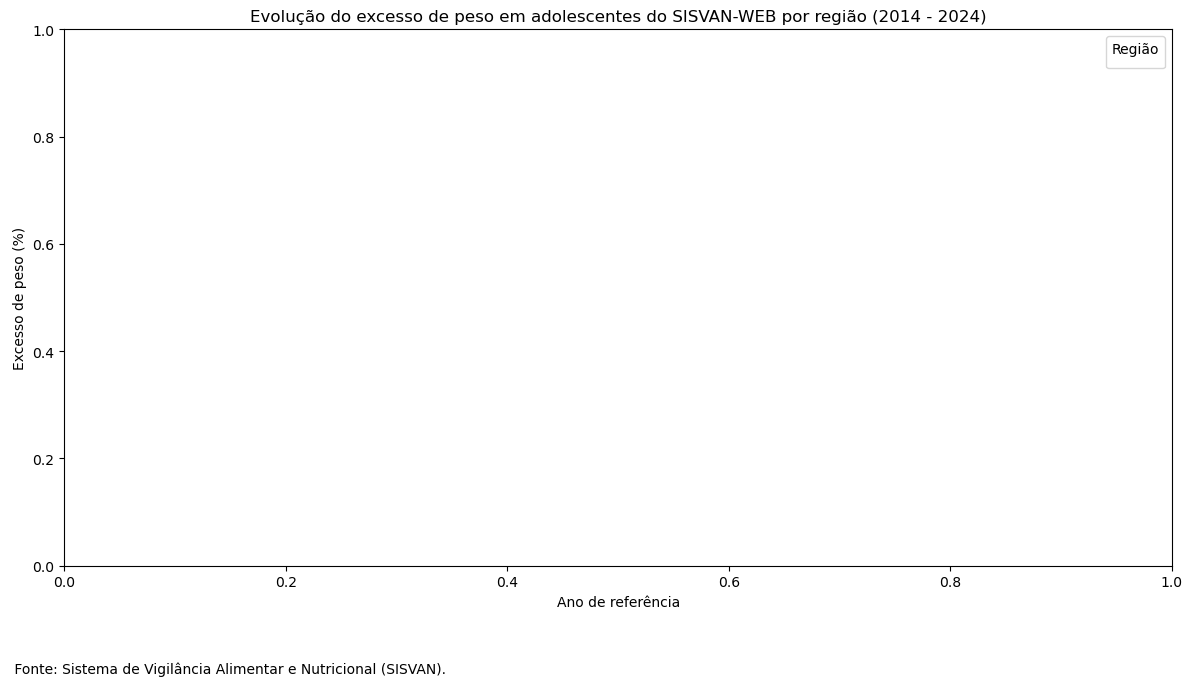

In [13]:
df_regioes.to_clipboard(decimal=",")
df_regioes['perc_total_obesidade'] = df_regioes['perc_total_obesidade'] * 100

plt.figure(figsize=(12, 7))  
cat_colors = ["#F9AAA9", "#632F21", "#E95F3A", "#114354", "#1F7A99"]
sns.set_palette(cat_colors)

regioes = df_regioes['regiao'].unique()

for regiao in regioes:
    data = df_regioes[df_regioes['regiao'] == regiao]
    if regiao == "Total Brasil":
        sns.lineplot(data=data, x='ano', y='perc_total_obesidade', label=regiao,linewidth=2.5, linestyle='--', color='black')  
    else:
        sns.lineplot(data=data, x='ano', y='perc_total_obesidade', label=regiao,linewidth=1.5)

plt.title('Evolução do excesso de peso em adolescentes do SISVAN-WEB por região (2014 - 2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.legend(title='Região')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()
